## Natural Disasters in Japan

#### Japan floods: At least 122 dead after heavy rain and landslides - CNN

https://www.cnn.com/2018/07/09/asia/japan-floods-intl/index.html

Questions:

* Is Japan really safe?

* Are natural disasters increasing in Japan?

* What causes natural disasters?


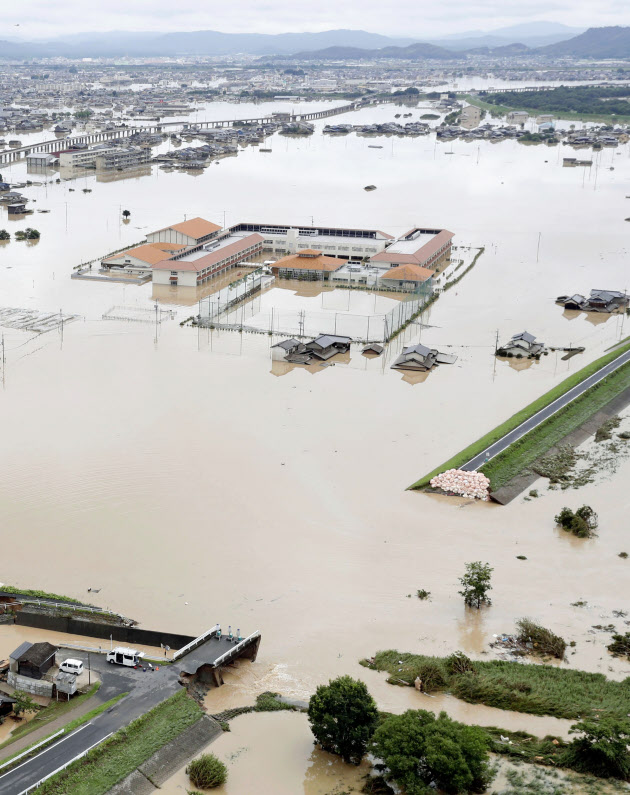

In [1]:
from IPython.display import Image
fig = Image(filename='96958A9F889DE1E0E5E6E4E5E5E2E2EAE2E5E0E2E3EAE2E2E2E2E2E2-DSXMZO3274747008072018000002-PB1-3.jpg')
fig

## Dataset

Japan's Fire and Disaster Management Agency gathers data on natural disasters (excluding earthquakes) which more than 100 people were killed.

http://www.fdma.go.jp/html/hakusho/h29/h29/html/shiryo1-5-1.html

In [2]:
import pandas as pd
df = pd.read_csv('shiryo1-5-1.csv' ,encoding='SHIFT-JIS')
df.head()

,番号（被害発生年月日）災害種目（被害地域）,人的被害（死者）（人）,人的被害（行方不明者）（人）,人的被害（負傷者）（人）,住家被害（全壊（流失））（棟）,住家被害（半壊）（棟）,住家被害（床上浸水）（棟）,住家被害（床下浸水）（棟）
0,1（1948.9.11〜12)水害（西日本）,121,126,317,391,872,246,2026
1,2（1948.9.15〜17)アイオン台風（関東、甲信、東北、特に岩手）,512,326,1956,5889,12127,44867,75168
2,3（1949.6.18〜22)デラ台風（九州から東北南部、特に鹿児島、愛媛）,252,216,367,1410,4005,4627,52926
3,4（1949.8.13〜18)ジュディス台風（九州、四国）,154,25,213,569,1966,33680,68314
4,5（1949.8.31〜9.1)キティ台風（東日本、特に関東）,135,25,479,3733,13470,51899,92161


In [3]:
df['Year'] = df['番号（被害発生年月日）災害種目（被害地域）'].str.extract('（([\d]{4})')
df['Death Toll'] = df['人的被害（死者）（人）']
df.head()

,番号（被害発生年月日）災害種目（被害地域）,人的被害（死者）（人）,人的被害（行方不明者）（人）,人的被害（負傷者）（人）,住家被害（全壊（流失））（棟）,住家被害（半壊）（棟）,住家被害（床上浸水）（棟）,住家被害（床下浸水）（棟）,Year,Death Toll
0,1（1948.9.11〜12)水害（西日本）,121,126,317,391,872,246,2026,1948,121
1,2（1948.9.15〜17)アイオン台風（関東、甲信、東北、特に岩手）,512,326,1956,5889,12127,44867,75168,1948,512
2,3（1949.6.18〜22)デラ台風（九州から東北南部、特に鹿児島、愛媛）,252,216,367,1410,4005,4627,52926,1949,252
3,4（1949.8.13〜18)ジュディス台風（九州、四国）,154,25,213,569,1966,33680,68314,1949,154
4,5（1949.8.31〜9.1)キティ台風（東日本、特に関東）,135,25,479,3733,13470,51899,92161,1949,135


In [4]:
df.groupby('Year')['Death Toll'].sum()

Year
1948     633
1949     541
1950     409
1951     734
1952     132
1953    2144
1954    1640
1955     182
1956      47
1957     586
1958    1062
1959    4885
1960     122
1961     574
1962     110
1963     228
1964     114
1965     153
1966     238
1967     185
1968     106
1972     421
1974     145
1976     161
1977     101
1979     110
1980     133
1982     427
1983     243
2004     220
2005     152
2010     131
2011     239
2012     104
Name: Death Toll, dtype: int64

In [5]:
disaster = {}
disaster['Year'] = df.groupby('Year')['Death Toll'].sum().keys().tolist()
disaster['Death Toll'] = df.groupby('Year')['Death Toll'].sum().tolist()
df_disaster = pd.DataFrame(disaster)
df_disaster.head()

,Year,Death Toll
0,1948,633
1,1949,541
2,1950,409
3,1951,734
4,1952,132


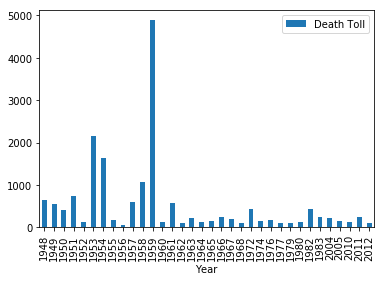

In [6]:
%matplotlib inline
df_disaster.plot(x='Year', kind='bar')

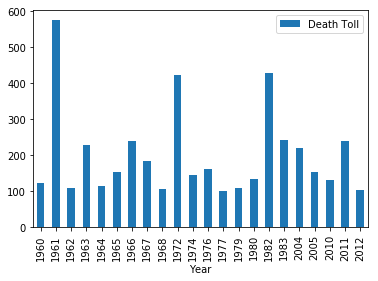

In [7]:
df_disaster[12:].plot(x='Year', kind='bar')

## Initial observation:

* Japan experienced the strongest ever typhoon in 1959 and it might be an outlier.
* After mid-1980s, no major disasters occurred for more than 20 years.
* But, there is some indication that disasters happen more frequent.

## Analysis of recent disasters

Japan's Fire and Disaster Management Agency also publishes more detailed information about recent disasters which emergency services were mobilized.

In [8]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

In [9]:
driver = webdriver.Chrome()

In [10]:
driver.get('http://www.fdma.go.jp/bn/2018/')

In [11]:
links = driver.find_elements_by_class_name('said')[1].find_elements_by_tag_name('li')

In [12]:
urls = []
for link in links[1:]:
    url_dic = {}
    url_dic['Year'] = link.find_element_by_tag_name('a').text
    url_dic['URL'] = link.find_element_by_tag_name('a').get_attribute('href')
    urls.append(url_dic)

In [13]:
df = pd.DataFrame(urls)
df.head()

,URL,Year
0,http://www.fdma.go.jp/bn/2018/,2018年
1,http://www.fdma.go.jp/bn/2017/,2017年
2,http://www.fdma.go.jp/bn/2016/,2016年
3,http://www.fdma.go.jp/bn/2015/,2015年
4,http://www.fdma.go.jp/bn/2014/,2014年


In [14]:
disaster_list = []
for url in df.URL:
    driver.get(url)
    events = driver.find_element_by_class_name('link_list_cms').find_elements_by_tag_name('li')
    year = driver.find_element_by_class_name('h_back')
    for event in events:
        event_dic = {}
        event_dic['Year'] = year.text
        event_dic['Disaster'] = event.find_element_by_tag_name('a').text
        event_dic['URL'] = event.find_element_by_tag_name('a').get_attribute('href')
        disaster_list.append(event_dic)

In [15]:
df_event = pd.DataFrame(disaster_list)
df_event.head()

,Disaster,URL,Year
0,平成30年07月11日 平成30年７月豪雨による被害に対する消防機関等の活動写真（愛媛県）,http://www.fdma.go.jp/bn/2018/detail/1059.html,2018年（平成30年）
1,平成30年07月11日 平成30年７月豪雨による被害に対する消防機関等の活動写真（岡山県）,http://www.fdma.go.jp/bn/2018/detail/1058.html,2018年（平成30年）
2,平成30年07月11日 平成30年７月豪雨による被害に対する消防機関等の活動写真（広島県）,http://www.fdma.go.jp/bn/2018/detail/1057.html,2018年（平成30年）
3,平成30年07月11日 平成30年７月豪雨による被害に対する消防団の活動写真,http://www.fdma.go.jp/bn/2018/detail/1056.html,2018年（平成30年）
4,平成30年07月07日 千葉県東方沖を震源とする地震（第3報 H30.7.7）,http://www.fdma.go.jp/bn/2018/detail/1054.html,2018年（平成30年）


In [16]:
df_event['Year'] = df_event['Year'].str.extract('([\d]{4})')
df_event['Date'] = df_event['Disaster'].str.extract('年([\w\d]+)')
df_event['Disaster'] = df_event['Disaster'].str.extract('　(.*)')
df_event.head()

,Disaster,URL,Year,Date
0,平成30年７月豪雨による被害に対する消防機関等の活動写真（愛媛県）,http://www.fdma.go.jp/bn/2018/detail/1059.html,2018,07月11日
1,平成30年７月豪雨による被害に対する消防機関等の活動写真（岡山県）,http://www.fdma.go.jp/bn/2018/detail/1058.html,2018,07月11日
2,平成30年７月豪雨による被害に対する消防機関等の活動写真（広島県）,http://www.fdma.go.jp/bn/2018/detail/1057.html,2018,07月11日
3,平成30年７月豪雨による被害に対する消防団の活動写真,http://www.fdma.go.jp/bn/2018/detail/1056.html,2018,07月11日
4,千葉県東方沖を震源とする地震（第3報 H30.7.7）,http://www.fdma.go.jp/bn/2018/detail/1054.html,2018,07月07日


In [17]:
df_floods = df_event[df_event['Disaster'].str.contains('雨')]
df_floods = df_floods[~df_floods['Disaster'].str.contains('写真')]
df_floods.head()

,Disaster,URL,Year,Date
6,平成30年７月豪雨による被害状況及び消防機関等の対応状況（第18報 H30.7.11更新）,http://www.fdma.go.jp/bn/2018/detail/1052.html,2018,07月03日
45,平成29年7月22日からの梅雨前線に伴う大雨による被害状況等について(第15報 H30.2.13),http://www.fdma.go.jp/bn/2017/detail/1010.html,2017,07月25日
48,平成29年6月30日からの梅雨前線に伴う大雨及び台風第3号の被害状況等について（第76報 H...,http://www.fdma.go.jp/bn/2017/detail/1007.html,2017,07月04日
81,北日本を中心とする平成28年8月20日からの大雨に係る被害状況等について(第15報・H29....,http://www.fdma.go.jp/bn/2016/detail/965.html,2016,08月20日
85,平成28年6月20日からの梅雨前線に伴う大雨による被害状況等について(第16報･Ｈ29.10...,http://www.fdma.go.jp/bn/2016/detail/959.html,2016,06月21日


In [18]:
floods_dic = {}
floods_dic['Year'] = df_floods['Year'].value_counts().keys().tolist()
floods_dic['Count'] = df_floods['Year'].value_counts().tolist()
floods = pd.DataFrame(floods_dic)
floods.sort_values(by=['Year'])

,Year,Count
0,1999,9
9,2000,2
4,2001,5
17,2002,1
14,2003,1
3,2004,6
5,2005,5
19,2006,1
2,2007,6
8,2008,3


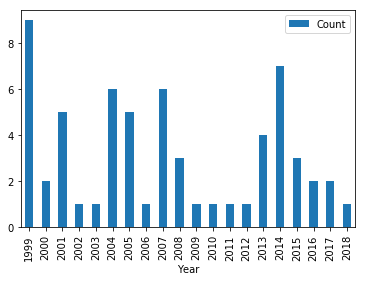

In [19]:
floods.sort_values(by=['Year']).plot(x='Year', kind='bar')

Actually, the number of floods is not increasing. What about the damages? To obtain the information, I need to read PDF files.

In [20]:
pdf_list = []
for url in df_floods['URL']:
    driver.get(url)
    pdf = driver.find_element_by_class_name('pdf').find_element_by_tag_name('a').get_attribute('href')
    pdf_list.append(pdf)

In [21]:
df_floods['PDF'] = pdf_list
df_floods.head()

,Disaster,URL,Year,Date,PDF
6,平成30年７月豪雨による被害状況及び消防機関等の対応状況（第18報 H30.7.11更新）,http://www.fdma.go.jp/bn/2018/detail/1052.html,2018,07月03日,http://www.fdma.go.jp/bn/77007f66677d63c13e289...
45,平成29年7月22日からの梅雨前線に伴う大雨による被害状況等について(第15報 H30.2.13),http://www.fdma.go.jp/bn/2017/detail/1010.html,2017,07月25日,http://www.fdma.go.jp/bn/6297b0824d46aec427b07...
48,平成29年6月30日からの梅雨前線に伴う大雨及び台風第3号の被害状況等について（第76報 H...,http://www.fdma.go.jp/bn/2017/detail/1007.html,2017,07月04日,http://www.fdma.go.jp/bn/8dfd00eb9313c7a9e9438...
81,北日本を中心とする平成28年8月20日からの大雨に係る被害状況等について(第15報・H29....,http://www.fdma.go.jp/bn/2016/detail/965.html,2016,08月20日,http://www.fdma.go.jp/bn/406438b62a4d2f1b00d06...
85,平成28年6月20日からの梅雨前線に伴う大雨による被害状況等について(第16報･Ｈ29.10...,http://www.fdma.go.jp/bn/2016/detail/959.html,2016,06月21日,http://www.fdma.go.jp/bn/daeef07a48f951e690370...


In [22]:
import tabula
df_tabula = tabula.read_pdf(df_floods['PDF'][6], lattice=True)
df_tabula.to_csv('1052.csv', index=False)
df_tabula

,都道府県名,人 的 被 害,住 家 被 害,非住家被害,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,死者,行 方\r不明者,負 傷 者,全壊,半壊,一部\r破損,床上\r浸水,床下\r浸水,公共\r建物,その他,NaN,NaN
1,NaN,NaN,NaN,重傷,軽傷,程度不明,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,人,人,人,人,人,棟,棟,棟,棟,棟,棟,棟
3,北海道,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,120,NaN,3
4,秋田県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
5,福島県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN
6,神奈川県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
7,富山県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
8,石川県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
9,福井県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN


In [23]:
df_tabula = pd.read_csv('1052.csv')
df_tabula.dropna(subset=['都道府県名'], inplace=True)
df_tabula

,都道府県名,死者,行方不明者,重傷,軽傷,程度不明,全壊,半壊,一部破損,床上浸水,床下浸水,公共建物,その他
1,北海道,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,120,NaN,3
2,秋田県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,福島県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN
4,神奈川県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
5,富山県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
6,石川県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
7,福井県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN
8,長野県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN
9,岐阜県,1,NaN,1,2,NaN,NaN,NaN,74,357,693,NaN,NaN
11,静岡県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN


The death toll of recent floods has reached 168 and still 57 people are missig. The damage has spread over 35 prefectures (Japan consists of 47 prefectures).

## How it looks if aggregating the data every 5 or 10 years?

In [24]:
df_disaster = df_disaster.append({'Year': 2018, 'Death Toll': df_tabula['死者'][36]}, ignore_index=True)
df_disaster['Year'] = pd.to_datetime(df_disaster['Year'], format='%Y' ,errors='ignore')
df_disaster['Death Toll'] = df_disaster['Death Toll'].astype(int)
df_disaster

,Year,Death Toll
0,1948-01-01,633
1,1949-01-01,541
2,1950-01-01,409
3,1951-01-01,734
4,1952-01-01,132
5,1953-01-01,2144
6,1954-01-01,1640
7,1955-01-01,182
8,1956-01-01,47
9,1957-01-01,586


In [25]:
df_disaster.set_index('Year', inplace=True)
df_disaster.head()

,Death Toll
Year,
1948-01-01,633
1949-01-01,541
1950-01-01,409
1951-01-01,734
1952-01-01,132


In [26]:
df_disaster = df_disaster.asfreq('AS', fill_value=0)
df_disaster

,Death Toll
Year,
1948-01-01,633
1949-01-01,541
1950-01-01,409
1951-01-01,734
1952-01-01,132
1953-01-01,2144
1954-01-01,1640
1955-01-01,182
1956-01-01,47


In [27]:
df_5Y = df_disaster.resample('5Y').sum()
df_5Y

,Death Toll
Year,
1948-12-31,633
1953-12-31,3960
1958-12-31,3517
1963-12-31,5919
1968-12-31,796
1973-12-31,421
1978-12-31,407
1983-12-31,913
1988-12-31,0


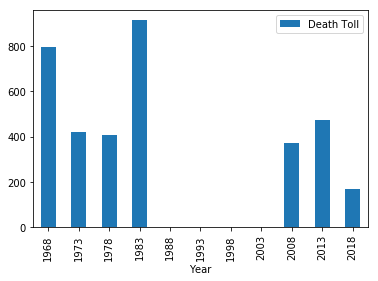

In [28]:
df_5Y['Year'] = df_5Y.index.year
df_5Y[4:].plot(x='Year', kind='bar')

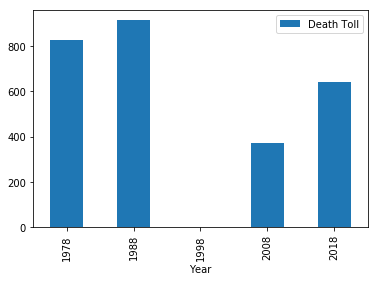

In [29]:
df_10Y = df_disaster.resample('10Y').sum()
df_10Y['Year'] = df_10Y.index.year
df_10Y[3:].plot(x='Year', kind='bar')

The impression depends on how to aggregate the data. If aggregating every 10 years, it looks major disasters are increasing.

## "nice to have" improvements:

* Analyse the data of earthquakes as well.
* Hopefully, I'd like to compare natural disaster data with crime data.